# 1. Contextualização

As eleições municipais são um importante termômetro para avaliar as dinâmicas sociais, políticas e culturais de uma região. No caso do Estado do Ceará, em 2024, a eleição de prefeitos oferece uma oportunidade de análise sobre possíveis fatores que influenciam o sucesso eleitoral dos candidatos.

Este projeto tem como objetivo investigar se características pessoais e sociais dos candidatos, como gênero, raça, escolaridade, ocupação e filiação partidária, estão associadas à sua probabilidade de serem eleitos.

A motivação para este estudo é identificar possíveis desigualdades ou padrões no processo eleitoral, como a sub-representação de mulheres e pessoas negras em cargos de poder. Com isso, pretende-se não apenas compreender o cenário atual, mas também fornecer subsídios para discussões sobre políticas públicas e práticas eleitorais mais inclusivas.

A análise será realizada com base no banco de dados dos candidatos a prefeito do Estado do Ceará em 2024, que inclui variáveis descritivas e o resultado final da eleição.

# 2. Pré-processamento
## 2.1 Leitura dos dados

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from matplotlib.colors import to_rgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("C:/Users/Luana Teles/Downloads/votacao_candidato.csv (1)/votacao_candidato.csv")



A base de dados não apresenta valores nulos e está preparada para análises descritivas e preditivas sobre os fatores que podem influenciar o sucesso eleitoral dos candidatos.

## Descrição das Variáveis do Conjunto de Dados

O conjunto de dados possui 471 registros de candidatos ao cargo de prefeito no Estado do Ceará em 2024, abrangendo 17 variáveis. As informações contemplam características pessoais (Gênero, Cor/raça, Faixa etária, Estado civil, Grau de instrução), políticas (Partido, Ocupação, Situação totalização) e de desempenho eleitoral (Votos válidos, Votos nominais). A seguir, apresenta-se uma breve descrição de cada variável:

### Variáveis de Identificação
| Variável              | Descrição |
|-----------------------|-----------|
| `Nome candidato`      | Nome completo do candidato. Usado apenas para identificação, sem valor preditivo. |
| `Número candidato`    | Número de urna do candidato. |

### Variáveis Demográficas
| Variável              | Descrição |
|-----------------------|-----------|
| `Gênero`              | Sexo do candidato (masculino ou feminino). |
| `Cor/raça`            | Autodeclaração racial (ex: branca, parda, preta). |
| `Faixa etária`        | Intervalo de idade do candidato. |
| `Estado civil`        | Estado civil (ex: solteiro, casado). |
| `Grau de instrução`   | Nível educacional alcançado. |
| `Ocupação`            | Profissão ou atividade principal antes da candidatura. |

### Variáveis Políticas e Geográficas
| Variável              | Descrição |
|-----------------------|-----------|
| `Partido`             | Partido político ao qual o candidato é filiado. |
| `Município`           | Município onde concorre à eleição. |
| `Região`              | Região cearense a que o município pertence. |
| `Cargo`               | Cargo disputado (prefeito). |
| `Turno`               | Turno da eleição (geralmente 1). |

### Variáveis Eleitorais (Resultado e Votos)
| Variável                  | Descrição |
|---------------------------|-----------|
| `Situação totalização`    | Resultado final da candidatura: **eleito** ou **não eleito**. **(variável alvo)** |
| `Votos nominais`          | Total de votos recebidos pelo candidato. |
| `Votos válidos`           | Total de votos válidos no município para o cargo. |

### Variável Técnica
| Variável            | Descrição |
|---------------------|-----------|
| `Data de carga`     | Data em que os dados foram extraídos ou carregados. |

In [3]:
display(data)

,Cargo,Cor/raça,Estado civil,Faixa etária,Gênero,Grau de instrução,Município,Nome candidato,Número candidato,Ocupação,Partido,Região,Situação totalização,Turno,Votos válidos,Votos nominais,Data de carga
0,Prefeito,Branca,Casado(a),45 a 49 anos,Masculino,Superior completo,SÃO GONÇALO DO AMARANTE,MARCELO FERREIRA TELES,13,Professor de Ensino Médio,PT,NORDESTE,Eleito,1,42747,28925,2025-02-18 08:31:12
1,Prefeito,Branca,Casado(a),40 a 44 anos,Masculino,Superior completo,QUIXERAMOBIM,PAULO JOSE GOMES FERREIRA,13,Técnico em Agronomia e Agrimensura,PT,NORDESTE,Não Eleito,1,48430,6656,2025-02-18 08:31:12
2,Prefeito,Branca,Solteiro(a),40 a 44 anos,Masculino,Superior completo,GUARACIABA DO NORTE,JOSÉ CEFAS PONTES MELO,55,Cientista Político,PSD,NORDESTE,Eleito,1,26801,15984,2025-02-18 08:31:12
3,Prefeito,Branca,Solteiro(a),40 a 44 anos,Masculino,Superior completo,PIQUET CARNEIRO,ISMAEL EDILTHON MARTINS NASCIMENTO,11,Médico,PP,NORDESTE,Não Eleito,1,10626,4601,2025-02-18 08:31:12
4,Prefeito,Branca,Casado(a),40 a 44 anos,Feminino,Superior completo,ACOPIARA,FABIA COLARES ALVES DE ALMEIDA BARBOSA,15,Farmacêutico,MDB,NORDESTE,Não Eleito,1,32778,14005,2025-02-18 08:31:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Prefeito,Parda,Casado(a),35 a 39 anos,Feminino,Ensino Fundamental incompleto,PENTECOSTE,ANTÔNIA ERINEIDE BRASILEIRO DE OLIVEIRA,35,Agricultor,PMB,NORDESTE,Não Eleito,1,26942,113,2025-02-18 08:31:12
467,Prefeito,Amarela,Casado(a),55 a 59 anos,Masculino,Ensino Médio completo,UMIRIM,FRANCISCO JOSE SOUSA,15,Servidor Público Municipal,MDB,NORDESTE,Não Eleito,1,13673,5549,2025-02-18 08:31:12
468,Prefeito,Branca,Casado(a),40 a 44 anos,Masculino,Ensino Médio completo,FRECHEIRINHA,MAIKE BISPO PONTES,40,Servidor Público Municipal,PSB,NORDESTE,Não Eleito,1,11809,5637,2025-02-18 08:31:12
469,Prefeito,Parda,Casado(a),55 a 59 anos,Masculino,Superior completo,CAUCAIA,ANTONIO AGINALDO DE OLIVEIRA,22,Militar Reformado,PL,NORDESTE,Não Eleito,1,193000,23628,2025-02-18 08:31:12


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cargo                 471 non-null    object
 1   Cor/raça              471 non-null    object
 2   Estado civil          471 non-null    object
 3   Faixa etária          471 non-null    object
 4   Gênero                471 non-null    object
 5   Grau de instrução     471 non-null    object
 6   Município             471 non-null    object
 7   Nome candidato        471 non-null    object
 8   Número candidato      471 non-null    int64 
 9   Ocupação              471 non-null    object
 10  Partido               471 non-null    object
 11  Região                471 non-null    object
 12  Situação totalização  471 non-null    object
 13  Turno                 471 non-null    int64 
 14  Votos válidos         471 non-null    int64 
 15  Votos nominais        471 non-null    in

### Distribuição de frequência

In [5]:
data = data[~data["Situação totalização"].str.contains("Segundo turno", na=False)]
data.rename(columns={'Situação totalização': 'Eleição'}, inplace=True)

**Análise da variável "Gênero":**

O conjunto de dados apresenta um total de 467 registros, dos quais:
- 374 (cerca de 80%) correspondem ao gênero **Masculino**,
- 93 (cerca de 20%) correspondem ao gênero **Feminino**.

Observa-se um desbalanceamento entre as categorias de gênero, com predominância de indivíduos do sexo masculino.  
Esse desbalanceamento pode influenciar os resultados de modelos preditivos.  
É importante considerar esse aspecto nas etapas de modelagem ou avaliar a necessidade de técnicas de balanceamento, como oversampling ou undersampling.


In [6]:
dfGen = data["Gênero"].value_counts()
display(pd.DataFrame(dfGen))

,count
Gênero,
Masculino,374
Feminino,93


**Análise da variável "Cor/Raça":**

A distribuição da variável "Cor/Raça" no conjunto de dados é a seguinte:
- 250 registros (aproximadamente 53,5%) são de pessoas **Brancas**,
- 199 registros (cerca de 42,6%) são de pessoas **Pardas**,
- 14 registros (cerca de 3,0%) são de pessoas **Pretas**,
- 3 registros (menos de 1%) são de pessoas que **Não Informaram** a cor/raça,
- 1 registro é de pessoa **Amarela**.

A maioria dos registros é composta por pessoas brancas e pardas.  
As categorias "Preta", "Amarela" e "Não Informado" possuem representatividade muito baixa, o que pode dificultar análises mais específicas para esses grupos.  

In [7]:
dfCor = data["Cor/raça"].value_counts()
display(pd.DataFrame(dfCor))

,count
Cor/raça,
Branca,250
Parda,199
Preta,14
Não Informado,3
Amarela,1


**Análise da variável "Eleição":**

A variável "Eleição" apresenta a seguinte distribuição:
- 283 registros (aproximadamente 60,6%) correspondem a candidatos **Não Eleitos**,
- 184 registros (cerca de 39,4%) correspondem a candidatos **Eleitos**.

Nota-se que a maior parte dos candidatos analisados não foi eleita.  
Esse desbalanceamento pode influenciar a performance dos modelos preditivos, principalmente por que estamos tentando prever o resultado da eleição.  
Em situações assim, é importante acompanhar as métricas de avaliação para ambos os grupos (eleitos e não eleitos) e considerar métodos para lidar com classes desbalanceadas, como ajuste de pesos ou técnicas de resampling.


In [8]:
dfResul = data["Eleição"].value_counts()
display(pd.DataFrame(dfResul))

,count
Eleição,
Não Eleito,283
Eleito,184


### Análise Raça por Eleição
Branca:

- Total: 250 candidatos.
- Eleitos: 100 (40%).
- Não Eleitos: 150 (60%).
- Maior grupo de candidatos e boa taxa de eleição.

Parda:

- Total: 199 candidatos.
- Eleitos: 82 (41.2%).
- Não Eleitos: 117 (58.8%).
- Segunda maior representatividade e taxa de eleição semelhante à dos brancos.

Preta:

- Total: 14 candidatos.
- Eleitos: 1 (7.1%).
- Não Eleitos: 13 (92.9%).
- Baixa representatividade e taxa de eleição muito baixa.

Não Informado:

- Total: 3 candidatos.
- Eleitos: 1 (33.3%).
- Não Eleitos: 2 (66.7%).
- Poucos registros, dificultando conclusões.

Amarela:

- Total: 1 candidato.
- Eleitos: 0 (0%).
- Não Eleitos: 1 (100%).
- Apenas um candidato, sem representatividade.

Conclusão:

- Brancos e Pardos dominam em número e têm taxas de eleição semelhantes (~40%).
- Pretos têm baixa representatividade e taxa de eleição muito inferior.
- Amarelos e Não Informados têm registros insuficientes para análises robustas.
- Pode-se ver desigualdade racial no processo eleitoral, visto que os dados sobre o Ceará apresentados na divulgação ‘Censo Demográfico 2022: Identificação étnico-racial da população, por sexo e idade’ revelaram que a população residente no Estado é formada predominantemente por pessoas pardas representando (64,7%), com pessoas brancas representando (27,9%), pessoas pretas (6,8%) e pessoas amarelas (0,1%).

[Agência IBGE](<https://agenciadenoticias.ibge.gov.br/agencia-noticias/2012-agencia-de-noticias/noticias/38749-no-ceara-ibge-divulga-resultados-do-censo-para-cor-ou-raca-com-apoio-do-banco-palmas#:~:text=Os%20dados%20sobre%20o%20Cear%C3%A1,6%25)%20e%2011.256%20amarelas>)

In [9]:
# Calcular a distribuição de frequência de raça por eleito
distribuicao_raca_eleito = data.groupby(['Cor/raça', 'Eleição']).size().unstack(fill_value=0)

# Ordenar pela soma total (do maior para o menor)
distribuicao_raca_eleito['Total'] = distribuicao_raca_eleito.sum(axis=1)
distribuicao_raca_eleito = distribuicao_raca_eleito.sort_values(by='Total', ascending=False)

# Exibir os resultados no formato de tabela
from IPython.display import display
display(distribuicao_raca_eleito)

Eleição,Eleito,Não Eleito,Total
Cor/raça,,,
Branca,100,150,250
Parda,82,117,199
Preta,1,13,14
Não Informado,1,2,3
Amarela,0,1,1


### Graficos

#### 1. Distribuição de Gênero
Gráfico: Mostra a contagem de candidatos por gênero.

A maioria dos candidatos é do gênero Masculino (cerca de 80%), enquanto apenas 20% são do gênero Feminino.
Esse desbalanceamento pode indicar desigualdade de gênero na participação política e pode influenciar os resultados de modelos preditivos.

#### 2. Eleição por Raça
Gráfico: Exibe a relação entre raça e situação eleitoral (eleito ou não eleito)

A maioria dos candidatos pertence às categorias Branca e Parda, refletindo a predominância dessas categorias no conjunto de dados.
As categorias Preta, Amarela, e Não Informado possuem baixa representatividade.
A proporção de candidatos eleitos parece variar entre as categorias de raça.
É possível que candidatos de algumas categorias (como Branca) tenham uma taxa de eleição maior em comparação com outras categorias, como Parda ou Preta.

### 3. Distribuição da Eleição
Gráfico: Mostra a contagem de candidatos eleitos e não eleitos.

A maioria dos candidatos não foi eleita (aproximadamente 60,6%), enquanto cerca de 39,4% foram eleitos.
Esse desbalanceamento pode impactar a performance de modelos preditivos, especialmente em tarefas de classificação.

### 4. Eleição por Gênero
Gráfico: Exibe a relação entre gênero e situação eleitoral (eleito ou não eleito).

A proporção de candidatos eleitos é maior entre homens, refletindo o desbalanceamento de gênero.
Isso pode indicar desigualdades estruturais que afetam as chances de sucesso eleitoral de mulheres.

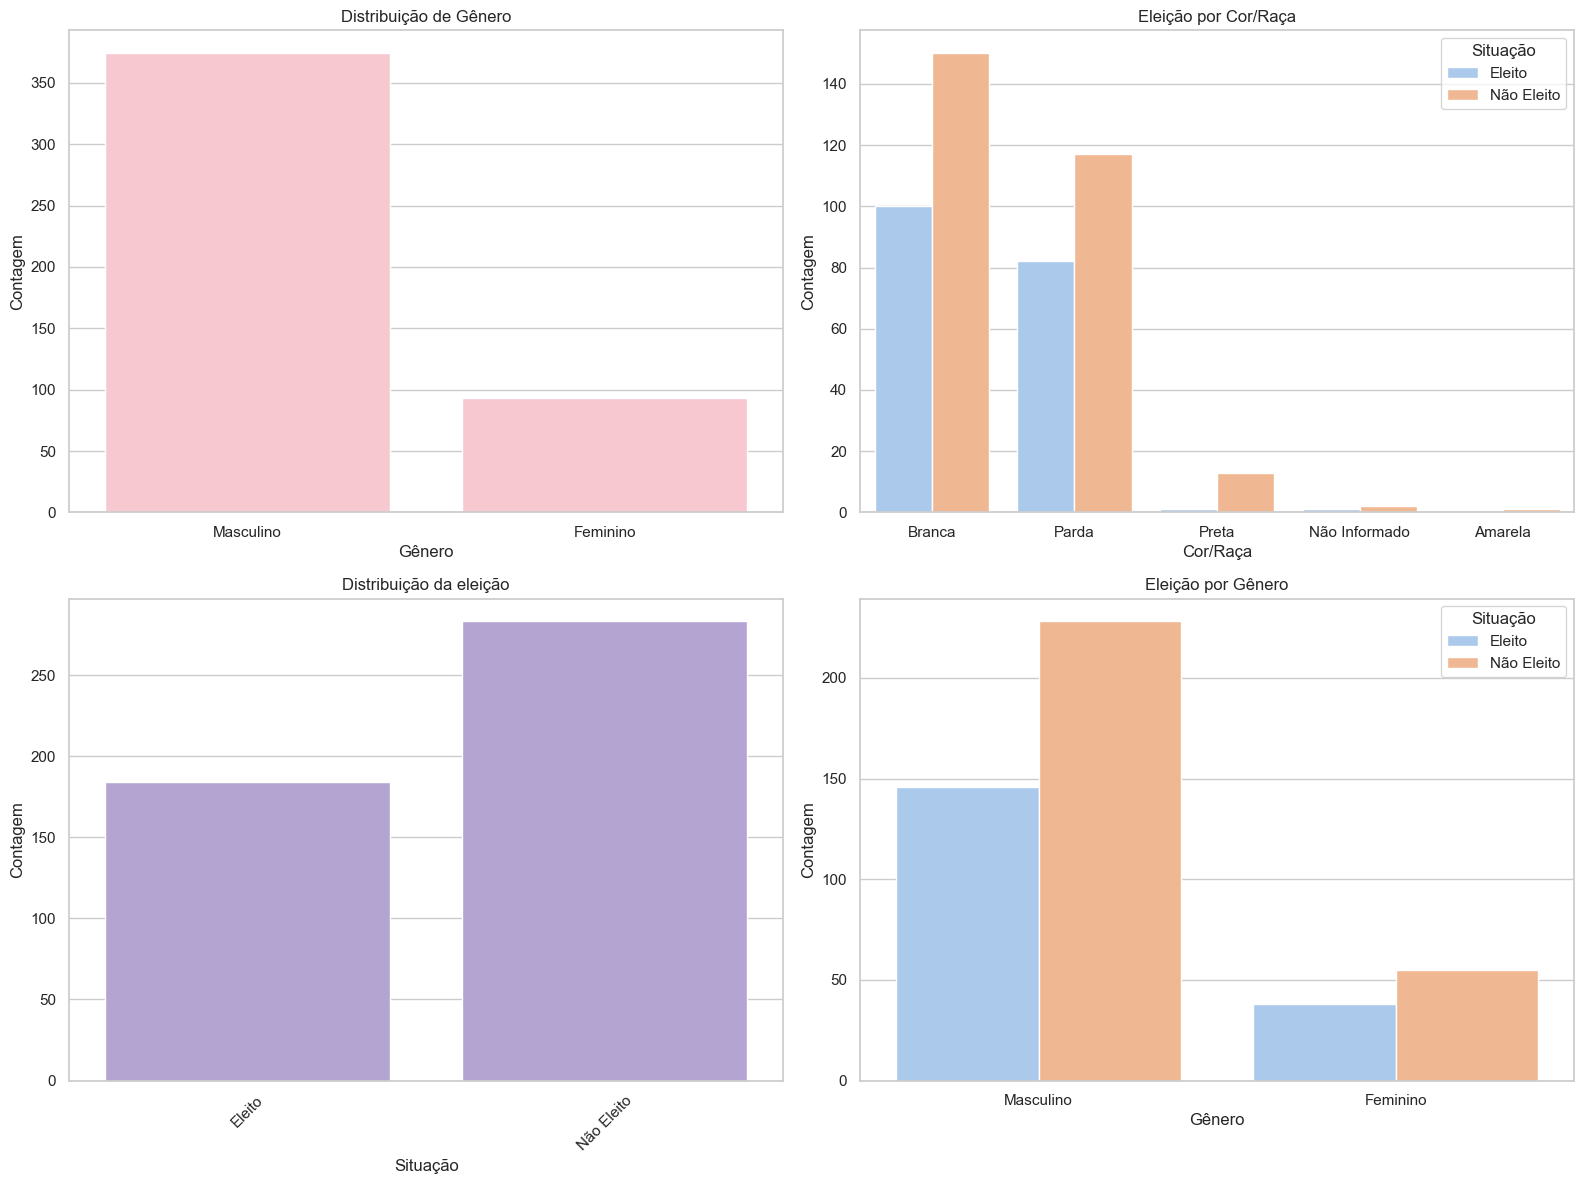

In [10]:
# Paleta de roxo/lilás ajustada para o número correto de categorias
palette_roxo_lilas =sns.color_palette("pastel", n_colors=data["Gênero"].nunique()) 
palette_raca = sns.color_palette("pastel", n_colors=data["Eleição"].nunique())
palette_pastel = sns.color_palette("pastel")
# Estilo bonito
sns.set(style="whitegrid")

# Criar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Gênero

sns.countplot(ax=axes[0, 0], x='Gênero', data=data, color='#FFC0CB')
axes[0, 0].set_title('Distribuição de Gênero')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].set_ylabel('Contagem')


sns.countplot(ax=axes[0, 1], x='Cor/raça', hue='Eleição', data=data, palette=palette_raca)
axes[0, 1].set_title('Eleição por Cor/Raça')
axes[0, 1].set_xlabel('Cor/Raça')
axes[0, 1].set_ylabel('Contagem')
axes[0, 1].legend(title='Situação')


# 3. Situação Totalização
sns.countplot(ax=axes[1, 0], x='Eleição', data=data, color= '#b19cd9')
axes[1, 0].set_title('Distribuição da eleição')
axes[1, 0].set_xlabel('Situação')
axes[1, 0].set_ylabel('Contagem')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Gráfico bivariado: Gênero vs Situação
sns.countplot(ax=axes[1, 1], x='Gênero', hue='Eleição', data=data, palette=palette_roxo_lilas)
axes[1, 1].set_title('Eleição por Gênero')
axes[1, 1].set_xlabel('Gênero')
axes[1, 1].set_ylabel('Contagem')
axes[1, 1].legend(title='Situação')

# Ajustar espaçamento
plt.tight_layout()
plt.show()

data.columns = data.columns.str.strip()

### 5. Distribuição de Cor/Raça
Gráfico: Mostra a contagem de candidatos por cor/raça.

A maioria dos candidatos é Branca (53,5%) ou Parda (42,6%), enquanto categorias como Preta, Amarela, e Não Informado têm baixa representatividade.
Essa baixa representatividade pode dificultar análises específicas para grupos minoritários.

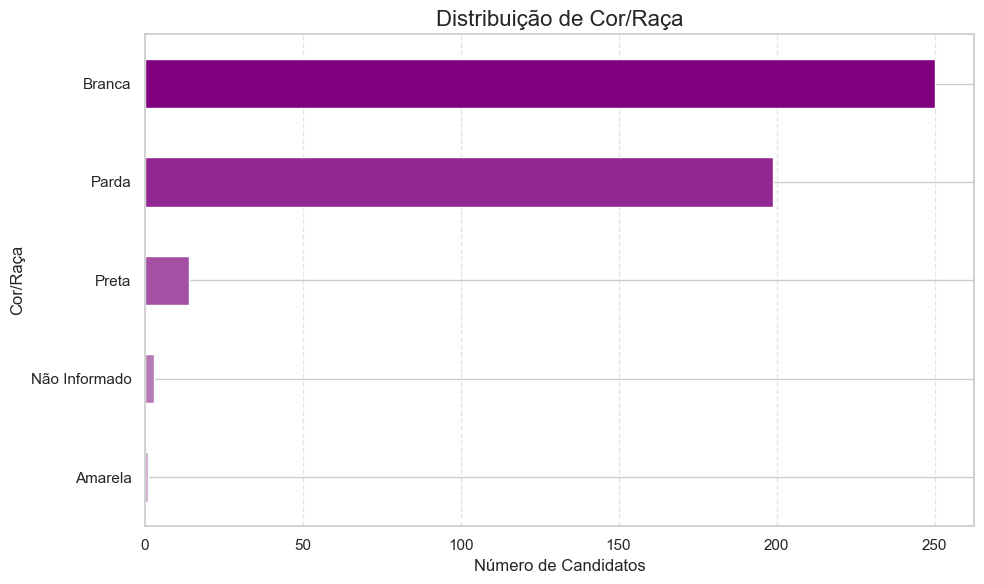

In [11]:
# Contar a frequência de cada cor/raça
contagem_raca = data['Cor/raça'].value_counts()

# Criar um degradê manual entre lilás e roxo
# Vamos usar a função np.linspace para criar tons entre o lilás (#C8A2C8) e roxo (#800080)


lilas = np.array(to_rgb("#C8A2C8"))  # lilás claro
roxo = np.array(to_rgb("#800080"))   # roxo escuro

# Gerar as cores interpoladas
cores = [(lilas * (1 - i) + roxo * i) for i in np.linspace(0, 1, len(contagem_raca))]
cores = [tuple(c) for c in cores]  # precisa ser tupla para matplotlib

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
contagem_raca.sort_values().plot(kind='barh', color=cores, ax=ax)

# Estilizar
ax.set_title('Distribuição de Cor/Raça', fontsize=16)
ax.set_xlabel('Número de Candidatos', fontsize=12)
ax.set_ylabel('Cor/Raça', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Medidas de disperção e posição

**Moda da variável "Cor/raça":**

A moda da variável "Cor/raça" é **Branca**, o que significa que a categoria mais frequente no conjunto de dados é "Branca".  
Esse resultado está alinhado com a análise de frequência anterior, onde a maioria dos registros (cerca de 53,5%) foi classificada como pertencente a essa categoria.  
Saber a moda é útil para entender qual grupo é predominante, o que pode ter impacto na análise e modelagem, especialmente se a variável "Cor/raça" for utilizada como uma feature preditiva.


In [12]:
moda_raca = data['Cor/raça'].mode()
# Exibir a moda
print("Moda da variável 'Cor/raça':")
for valor in moda_raca:
    print(f"- {valor}")

Moda da variável 'Cor/raça':
- Branca


**Análise descritiva das variáveis "Votos válidos" e "Votos nominais":**

As estatísticas descritivas das variáveis "Votos válidos" e "Votos nominais" revelam uma distribuição assimétrica à direita (positivamente assimétrica), caracterizada por:

- **Média significativamente maior que a mediana**: indica a presença de valores extremos elevados (outliers) que puxam a média para cima.
- **Amplitude ampla**: a diferença entre os valores mínimos e máximos é grande, sugerindo alta variabilidade nos dados.
- **Quartis distantes**: a diferença entre o 1º quartil (Q1) e o 3º quartil (Q3) é considerável, reforçando a dispersão dos dados.

Essas características sugerem que a maioria dos candidatos recebeu uma quantidade relativamente baixa de votos, enquanto poucos candidatos obtiveram votações muito altas. Essa distribuição é comum em eleições proporcionais, onde poucos candidatos concentram a maioria dos votos.


In [13]:
variaveis_quanti = ['Votos válidos', 'Votos nominais'] 

# Calcular medidas de posição
medidas_posicao = pd.DataFrame(index=variaveis_quanti)

medidas_posicao['Média'] = data[variaveis_quanti].mean()
medidas_posicao['Mediana'] = data[variaveis_quanti].median()
medidas_posicao['Mínimo'] = data[variaveis_quanti].min()
medidas_posicao['Máximo'] = data[variaveis_quanti].max()
medidas_posicao['1º Quartil (Q1)'] = data[variaveis_quanti].quantile(0.25)
medidas_posicao['3º Quartil (Q3)'] = data[variaveis_quanti].quantile(0.75)

# Mostrar as medidas
print(medidas_posicao)

                       Média  Mediana  Mínimo   Máximo  1º Quartil (Q1)  \
Votos válidos   51864.920771  16805.0    4018  1421428          10922.0   
Votos nominais  12901.642398   6097.0       0   716133           2635.5   

                3º Quartil (Q3)  
Votos válidos           30384.0  
Votos nominais          10943.0  


## 2.3 Transformação de variáveis

**Análise da variável "Faixa de Votos":**

A distribuição dos registros entre as categorias de faixa de votos é:
- **Muito Baixo**: 43 registros (candidatos com votação muito reduzida),
- **Baixo**: 149 registros,
- **Médio**: 253 registros,
- **Alto**: apenas 10 registros (candidatos com votações expressivamente altas).

**Conclusão:**
A maioria dos candidatos está concentrada na faixa "Médio" (cerca de 54%), seguida pela faixa "Baixo" (cerca de 32%).  
Pouquíssimos candidatos alcançaram a classificação "Alto", indicando que receber votações muito expressivas é um evento raro.  
Essa distribuição reforça a presença de assimetria nos dados, com poucos candidatos recebendo grande quantidade de votos enquanto a maioria possui votações mais modestas.
Essa asimetria é dada pela desproporção da população entre as cidades, vito que em cidades como Fortaleza, contem cerca de 2.428.708 pessoas registradas no ultimo censo do IBGE em 2022, enquanto cidades como Granjeiro possui crca de 4.841 pessoas.

[IBGE](https://censo2022.ibge.gov.br/panorama/)

[Cearaagora](https://cearaagora.com.br/censo-ibge-confira-a-populacao-atualizada-dos-184-municipios-cearenses/)

In [14]:
bins = [0, 500, 5000, 50000, 500000]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto']
data['Faixa de Votos'] = pd.cut(data['Votos nominais'], bins=bins, labels=labels, ordered=True)
# Exibindo o count na ordem correta
contagem_faixa = data['Faixa de Votos'].value_counts(sort=False)  # sort=False respeita a ordem dos labels
print(contagem_faixa)

Faixa de Votos
Muito Baixo     43
Baixo          149
Médio          253
Alto            10
Name: count, dtype: int64


### Resultados da Simplificação da Variável 'Cor/raça'

A saída de `data['Raça Simplificada'].value_counts()` revela a distribuição das categorias após a simplificação da variável 'Cor/raça':

* **Branco:** 250 ocorrências
* **Não Branco:** 217 ocorrências

Esses resultados indicam que, na sua base de dados, após o agrupamento das categorias 'Parda', 'Preta', 'Amarela', 'Indígena' e 'Não Informado' em 'Não Branco', a categoria 'Branco' possui uma frequência ligeiramente maior (250) em comparação com a categoria 'Não Branco' (217).


In [15]:
mapeamento_raca = {
    'Branca': 'Branco',
    'Parda': 'Não Branco',
    'Preta': 'Não Branco',
    'Amarela': 'Não Branco',
    'Indígena': 'Não Branco',
    'Não Informado': 'Não Branco'
}

# Criar a nova coluna Raça Simplificada
data['Raça Simplificada'] = data['Cor/raça'].map(mapeamento_raca)

# Conferir como ficou
print(data['Raça Simplificada'].value_counts())


Raça Simplificada
Branco        250
Não Branco    217
Name: count, dtype: int64


### Contagem de Valores da Variável 'Ocupação Simplificada'

A distribuição das ocupações mostra que a política local é dominada por empresários, prefeitos em busca de reeleição, e profissionais liberais como advogados e médicos.
Ocupações menos frequentes, como professores e servidores públicos, refletem uma diversidade menor, mas ainda relevante.
A categoria "Outros" agrupa ocupações com baixa representatividade.

In [16]:
data["Ocupação"].value_counts()
# Contar a quantidade de candidatos por ocupação
ocupacao_counts = data['Ocupação'].value_counts()

# Ocupações que aparecem menos de 9 vezes
ocupacoes_menor_5 = ocupacao_counts[ocupacao_counts < 5].index

# Substituir ocupações menos frequentes por "Outros"
data['Ocupação Simplificada'] = data['Ocupação'].replace(ocupacoes_menor_5, 'Outros')

# Conferir o resultado
print(data['Ocupação Simplificada'].value_counts())

Ocupação Simplificada
Empresário                              88
Outros                                  81
Prefeito                                67
Advogado                                44
Médico                                  36
Vereador                                25
Agricultor                              18
Administrador                           17
Comerciante                             17
Servidor Público Municipal              12
Professor de Ensino Fundamental          9
Engenheiro                               8
Enfermeiro                               7
Contador                                 6
Aposentado (Exceto Servidor Público)     6
Servidor Público Estadual                6
Professor de Ensino Médio                5
Policial Militar                         5
Pedagogo                                 5
Deputado                                 5
Name: count, dtype: int64


Transforma as variaveis : 'Eleito' e 'Não Eleito' em 1 e 0, respectivamente.

In [17]:
# Verificar os valores únicos na coluna 'Eleição'
print("Valores únicos antes do mapeamento:", data['Eleição'].unique())

# Aplicar o mapeamento
data['Eleição'] = data['Eleição'].map({'Não Eleito': 0, 'Eleito': 1})

# Verificar se há valores NaN após o mapeamento
print("Valores únicos após o mapeamento:", data['Eleição'].unique())

# Tratar valores NaN, se necessário
if data['Eleição'].isna().sum() > 0:
    print("Existem valores não mapeados. Verifique os dados originais.")

Valores únicos antes do mapeamento: ['Eleito' 'Não Eleito']
Valores únicos após o mapeamento: [1 0]



## 2.4 Partição dos dados entre treino e validação

Nesta seção faremos a partição dos dados entre treino e validação.

### 1. Separação das variáveis
X (variáveis independentes):

Inclui as colunas: 'Gênero', 'Raça Simplificada', 'Partido', 'Estado civil', 'Faixa etária', 'Grau de instrução', e 'Ocupação'.
Essas variáveis são usadas como preditores para o modelo, ou seja, características que podem influenciar o resultado da eleição.
y (variável dependente):

Representa a coluna 'Eleição', que é a variável-alvo.
Supõe-se que foi codificada como binária: 0 para "Não Eleito" e 1 para "Eleito".
O objetivo do modelo será prever essa variável com base nas características de X.
### 2. Divisão dos dados
train_test_split:
Divide os dados em dois subconjuntos:
Treino (X_train, y_train): 70% dos dados (por padrão, test_size=0.3 significa que 30% dos dados são reservados para validação).
Usado para treinar o modelo.
Validação (X_val, y_val): 30% dos dados.
Usado para avaliar o desempenho do modelo em dados que ele não viu durante o treinamento.
random_state=42:
Garante que a divisão seja reproduzível, ou seja, sempre resultará nos mesmos subconjuntos ao executar o código.
### 3. Objetivo
Essa divisão é uma prática comum em aprendizado de máquina para evitar overfitting (quando o modelo se ajusta demais aos dados de treino e não generaliza bem para novos dados).
O conjunto de validação permite medir a capacidade do modelo de generalizar para dados desconhecidos, fornecendo uma estimativa mais confiável de seu desempenho.

In [18]:
# Separar variável dependente e independentes
X = data[['Gênero', 'Raça Simplificada', 'Partido', 'Estado civil', 'Faixa etária', 'Grau de instrução', 'Ocupação']]
y = data['Eleição']  # supondo que você criou uma coluna binária "Eleito" 0/1

# Dividir
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# 3.Modelagem

## 3.1 Modelos Manualmente Definidos

Nesta seção, foram testados três algoritmos distintos com parâmetros padrão, utilizando a base de dados processada. A variável-alvo foi a eleição do candidato (0 = não eleito, 1 = eleito).

### Modelo de Árvore de Decisão

A Árvore de Decisão apresentou a **melhor acurácia até o momento**, atingindo **0.744**, ou seja, cerca de **74,5% de acerto** na previsão do status eleitoral dos candidatos.

**Relatório de Classificação:**

| Classe | Precision | Recall | F1-score | Suporte |
|--------|-----------|--------|----------|---------|
| 0 (Não Eleito) | 0.76 | 0.85 | 0.80 | 86 |
| 1 (Eleito)     | 0.71 | 0.58 | 0.64 | 55 |

- A classe "Não Eleito" continua sendo melhor prevista, com **alta taxa de recall (85%)** e **bom F1-score (0.80)**.
- A classe "Eleito" ainda tem recall inferior (58%), o que indica que o modelo tende a confundir parte desses candidatos como não eleitos.
- A pontuação média ponderada (weighted avg) do F1-score ficou em **0.74**, refletindo um bom equilíbrio.

**Matriz de Confusão:**

|               | Previsto: Não Eleito | Previsto: Eleito |
|---------------|----------------------|------------------|
| **Real: Não Eleito** | 73                   | 13               |
| **Real: Eleito**     | 23                   | 32               |

- O modelo classificou corretamente 73 dos 86 eleitos (verdadeiros negativo) e 32 dos 55 não eleitos (verdadeiros positivos).
- A quantidade de **falsos negativos (23)** e **falsos positivos (13)** é aceitável, considerando a simplicidade e interpretabilidade do modelo.

**Conclusão:**  
A Árvore de Decisão entrega **bons resultados de classificação**, com destaque para sua **alta interpretabilidade** (regras de decisão claras). Apesar de um leve viés a favor da classe "Eleito", o desempenho geral é forte, o que pode ser útil em contextos que valorizam transparência no processo decisório.




Acurácia( Arvore de decisão): 0.7446808510638298

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        86
           1       0.71      0.58      0.64        55

    accuracy                           0.74       141
   macro avg       0.74      0.72      0.72       141
weighted avg       0.74      0.74      0.74       141


Matriz de Confusão:
 [[73 13]
 [23 32]]


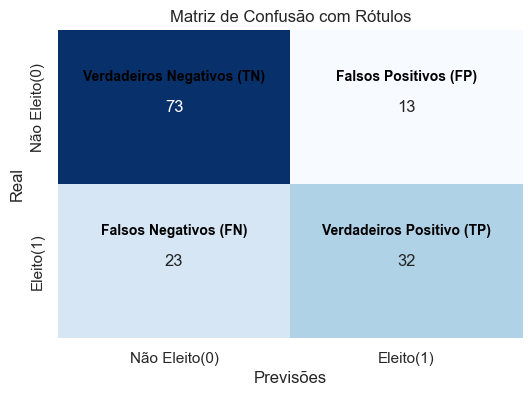

In [19]:
X = data[['Gênero', 'Raça Simplificada', 'Partido', 'Estado civil', 'Faixa etária', 'Grau de instrução', 'Ocupação']]
y = data['Eleição']

# Transformar variáveis categóricas em números (label encoding rápido)
X_encoded = X.apply(LabelEncoder().fit_transform)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Ajustando a árvore com critério "entropy" e max_depth=4
modelo_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
modelo_entropy.fit(X_train, y_train)

# Predições
y_pred_entropy = modelo_entropy.predict(X_test)

# Avaliação
print('Acurácia( Arvore de decisão):', accuracy_score(y_test, y_pred_entropy))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred_entropy))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_entropy))

def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'


            # Ajustar a posição do texto para não sobrepor os números
            y_offset = -0.2  # Deslocar o texto para baixo
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()
cm = confusion_matrix(y_test, y_pred_entropy)
labels = ['Não Eleito(0)','Eleito(1)']  

# Plotar a matriz de confusão com rótulos
plot_confusion_matrix_with_labels(cm, labels)

### **Modelo Random Forest**
O modelo Random Forest apresentou uma acurácia de **0.695**, ou seja, acertou aproximadamente **69,5%** das previsões no conjunto de teste.

---

### **Relatório de Classificação**

| Classe             | Precision | Recall | F1-score | Suporte |
|--------------------|-----------|--------|----------|---------|
| 0 (Não Eleito)     | 0.76      | 0.74   | 0.75     | 86      |
| 1 (Eleito)         | 0.61      | 0.64   | 0.62     | 55      |


- **Classe 0 (Não Eleito):**
  - **Precision (76%)**: Quando o modelo previu não  eleição, acertou 76% das vezes.
  - **Recall (74%)**: De todos os não eleitos, o modelo identificou corretamente 74%.
  - **F1-score (75%)**: Indica bom desempenho do modelo nessa classe.

- **Classe 1 (Eleito):**
  - **Precision (61%)**: Quando o modelo previu que o candidato seria eleito, acertou 61% das vezes.
  - **Recall (64%)**: De todos os candidatos que realmente foram eleitos, o modelo identificou corretamente 64%.
  - **F1-score (62%)**: Indica um desempenho razoável, equilibrando precisão e abrangência.
---

### **Matriz de Confusão**

|                         | Previsto: Não Eleito | Previsto: Eleito |
|-------------------------|----------------------|------------------|
| **Real: Não Eleito**    | 64                   | 22               |
| **Real: Eleito**        | 20                   | 35               |

- **Verdadeiros Negativos (VN)**: 64
- **Falsos Positivos (FP)**: 22
- **Falsos Negativos (FN)**: 20    
- **Verdadeiros Positivos (VP)**: 35 



Acurácia Random Forest: 0.7021276595744681

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75        86
           1       0.61      0.64      0.62        55

    accuracy                           0.70       141
   macro avg       0.69      0.69      0.69       141
weighted avg       0.70      0.70      0.70       141


Matriz de Confusão:
 [[64 22]
 [20 35]]


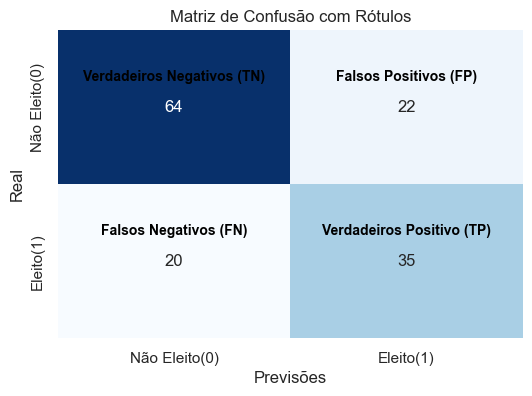

In [20]:
# Criação do modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores

# Treinamento
modelo_rf.fit(X_train, y_train)

# Predições
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print('Acurácia Random Forest:', accuracy_score(y_test, y_pred_rf))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred_rf))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_rf))
def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'


            # Ajustar a posição do texto para não sobrepor os números
            y_offset = -0.2  # Deslocar o texto para baixo
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()

# Fazer predições
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_rf )
labels = ['Não Eleito(0)','Eleito(1)']  

# Plotar a matriz de confusão com rótulos
plot_confusion_matrix_with_labels(cm, labels)

### **Modelo Gradient Boosting**
O modelo Gradient Boosting apresentou uma acurácia de **0.7447**, ou seja, acertou aproximadamente **74,5%** das previsões no conjunto de teste.

---

### **Relatório de Classificação**

| Classe             | Precision | Recall | F1-score | Suporte |
|--------------------|-----------|--------|----------|---------|
| 0 (Não Eleito)     | 0.76      | 0.85   | 0.80     | 86      |
| 1 (Eleito)         | 0.71      | 0.58   | 0.64     | 55      |


- **Classe 0 (Não Eleito):**
  - **Precision (76%)**: Quando o modelo previu não eleição, acertou 76% das vezes.
  - **Recall (85%)**: De todos os não eleitos, o modelo identificou corretamente 85%.
  - **F1-score (80%)**: Indica desempenho muito bom nessa classe.

- **Classe 1 (Eleito):**
  - **Precision (71%)**: Quando o modelo previu que o candidato seria eleito, acertou 71% das vezes.
  - **Recall (58%)**: De todos os candidatos que realmente foram eleitos, o modelo identificou corretamente 58%.
  - **F1-score (64%)**: Indica desempenho razoável, com espaço para melhorias.

---

### **Matriz de Confusão**

|                         | Previsto: Não Eleito | Previsto: Eleito |
|-------------------------|----------------------|------------------|
| **Real: Não Eleito**    | 73                   | 13               |
| **Real: Eleito**        | 23                   | 32               |

- **Verdadeiros Negativos (VN)**: 73
- **Falsos Positivos (FP)**: 13 
- **Verdadeiros Positivos (VP)**: 32  
- **Falsos Negativos (FN)**: 23  


Acurácia (Gradient Boosting): 0.7446808510638298

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80        86
           1       0.71      0.58      0.64        55

    accuracy                           0.74       141
   macro avg       0.74      0.72      0.72       141
weighted avg       0.74      0.74      0.74       141


Matriz de Confusão:
 [[73 13]
 [23 32]]


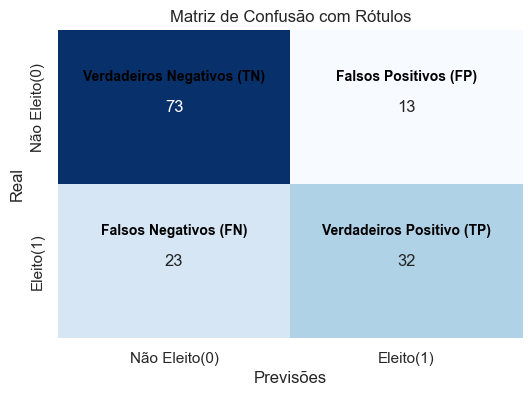

In [21]:
# Criar o modelo
gb = GradientBoostingClassifier(random_state=42)

# Treinar
gb.fit(X_train, y_train)

# Prever
y_pred_gb = gb.predict(X_test)

# Avaliar
print('Acurácia (Gradient Boosting):', accuracy_score(y_test, y_pred_gb))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred_gb))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_gb))


def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'


            # Ajustar a posição do texto para não sobrepor os números
            y_offset = -0.2  # Deslocar o texto para baixo
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()


# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_gb)
labels = ['Não Eleito(0)','Eleito(1)']  

# Plotar a matriz de confusão com rótulos
plot_confusion_matrix_with_labels(cm, labels)

### **Acurácia Geral**
O modelo XGBoost apresentou uma acurácia de **0.688**, ou seja, acertou aproximadamente **68,8%** das previsões no conjunto de teste.

---

### **Relatório de Classificação**

| Classe             | Precision | Recall | F1-score | Suporte |
|--------------------|-----------|--------|----------|---------|
| 0 (Não Eleito)     | 0.74      | 0.74   | 0.74     | 86      |
| 1 (Eleito)         | 0.60      | 0.60   | 0.60     | 55      |

- **Classe 0 (Não Eleito):**
  - **Precision (74%)**: Quando o modelo previu que o candidato não seria eleito, acertou 74% das vezes.
  - **Recall (74%)**: De todos os candidatos que realmente não foram eleitos, o modelo identificou corretamente 74%.
  - **F1-score (74%)**: Indica bom desempenho geral na identificação dos não eleitos.

- **Classe 1 (Eleito):**
  - **Precision (60%)**: Quando o modelo previu que o candidato seria eleito, acertou 60% das vezes.
  - **Recall (60%)**: De todos os candidatos que realmente foram eleitos, o modelo identificou corretamente 60%.
  - **F1-score (60%)**: Indica desempenho razoável, com espaço para melhorias.

---

### **Matriz de Confusão**

|                         | Previsto: Não Eleito | Previsto: Eleito |
|-------------------------|----------------------|------------------|
| **Real: Não Eleito**    | 73                   | 13               |
| **Real: Eleito**        | 23                   | 32               |

- **Verdadeiros Negativos (VN)**: 73  
- **Falsos Positivos (FP)**: 13  
- **Falsos Negativos (FN)**: 23  
- **Verdadeiros Positivos (VP)**: 32


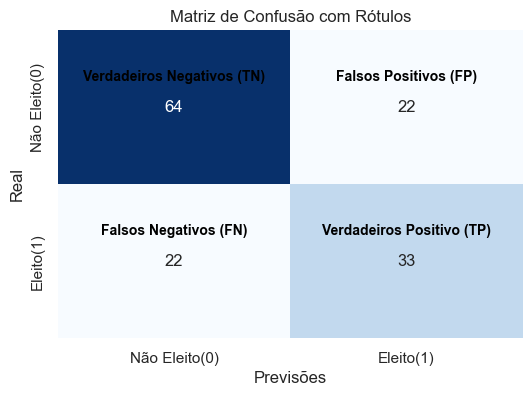

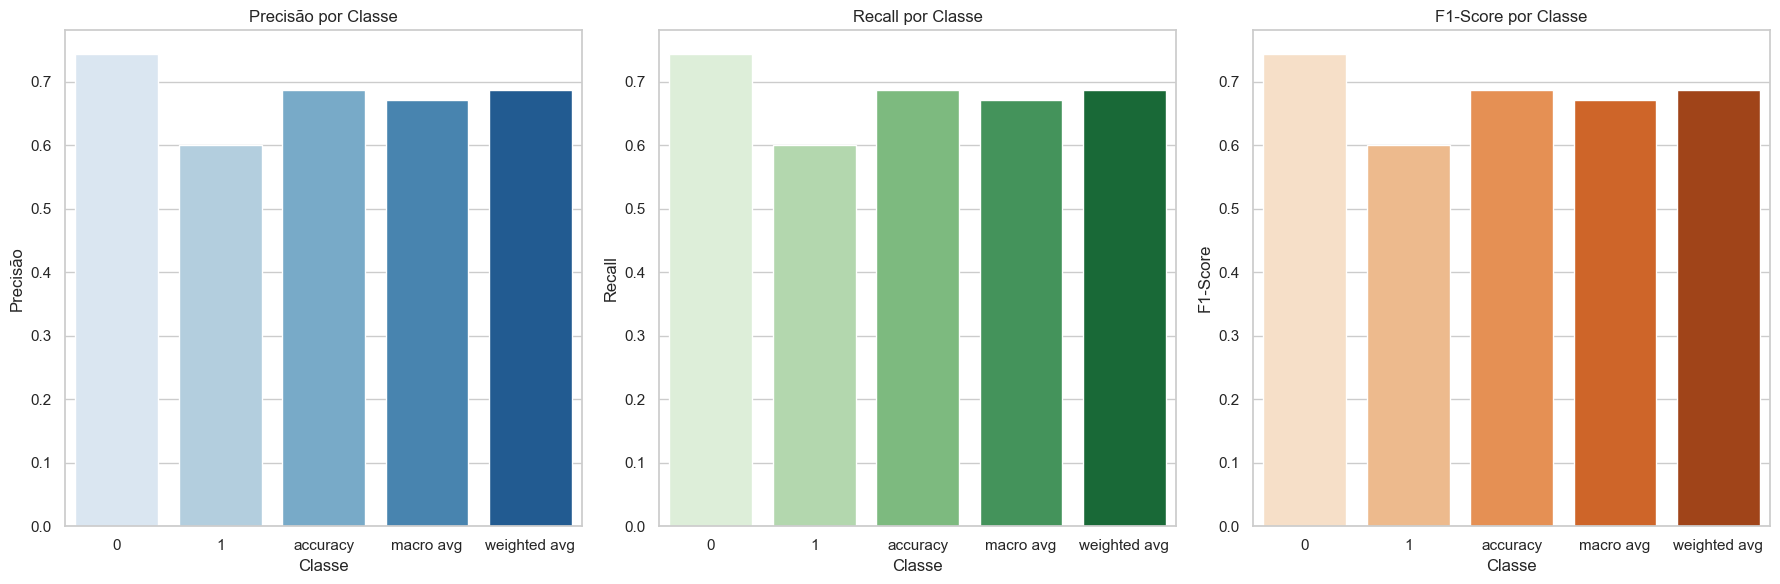


Relatório de Classificação Completo:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        86
           1       0.60      0.60      0.60        55

    accuracy                           0.69       141
   macro avg       0.67      0.67      0.67       141
weighted avg       0.69      0.69      0.69       141

Acurácia (XGBoost): 0.6879432624113475

Matriz de Confusão:
 [[73 13]
 [23 32]]


In [22]:

# Função para plotar a Matriz de Confusão com rótulos explicativos
def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'

            # Ajustar a posição do texto para não sobrepor os números
            y_offset = -0.2  # Deslocar o texto para baixo
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()

# Criar e treinar o modelo XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Fazer predições
y_pred_xgb = xgb_model.predict(X_test)
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)
labels = ['Não Eleito(0)','Eleito(1)']  

# Plotar a matriz de confusão com rótulos
plot_confusion_matrix_with_labels(cm, labels)

# Relatório de classificação
report = classification_report(y_test, y_pred_xgb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotar as métricas de precisão, recall e f1-score em gráficos de barras
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precisão
sns.barplot(x=report_df.index, y=report_df['precision'], ax=axes[0], hue=report_df.index, palette='Blues')
axes[0].set_title('Precisão por Classe')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Precisão')

# Recall
sns.barplot(x=report_df.index, y=report_df['recall'], ax=axes[1], hue=report_df.index, palette='Greens')
axes[1].set_title('Recall por Classe')
axes[1].set_xlabel('Classe')
axes[1].set_ylabel('Recall')

# F1-Score
sns.barplot(x=report_df.index, y=report_df['f1-score'], ax=axes[2], hue=report_df.index, palette='Oranges')
axes[2].set_title('F1-Score por Classe')
axes[2].set_xlabel('Classe')
axes[2].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()

print('\nRelatório de Classificação Completo:\n', classification_report(y_test, y_pred_xgb))
print('Acurácia (XGBoost):', accuracy_score(y_test, y_pred_xgb))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_gb))

## 3.2 Modelos Otimamente Definidos


Utilizando busca em grade (Grid Search) com validação cruzada em 5 dobras, realizamos a otimização dos hiperparâmetros do modelo Random Forest. Foram testadas 108 combinações de parâmetros, totalizando 540 execuções no processo de busca.

**Resultado da Acurácia (dados de validação):**  
O modelo otimizado obteve uma acurácia de **0.730** (ou seja, cerca de **73%** de acerto nas previsões).

**Relatório de Classificação:**

| Classe | Precision | Recall | F1-score | Suporte |
|--------|-----------|--------|----------|---------|
| 0 (Não Eleito) | 0.74 | 0.87 | 0.80 | 86 |
| 1 (Eleito)     | 0.72 | 0.51 | 0.60 | 55 |

- O modelo tem desempenho **muito bom na classe "Não Eleito" (0)**, com **87% de recall**, o que indica que quase todos os eleitos foram corretamente identificados.
- Na classe "Eleito" (1), o recall foi mais baixo (**51%**), ou seja, quase metade dos não eleitos foram classificados incorretamente como eleitos.
- A pontuação F1 geral ponderada foi **0.72**, mostrando um bom equilíbrio entre precisão e recall no conjunto de dados.

**Matriz de Confusão:**

|               | Previsto: Eleito | Previsto: Não Eleito |
|---------------|----------------------|------------------|
| **Real: Não Eleito** | 75                   | 11               |
| **Real: Eleito**     | 27                   | 28               |

- **Erros principais:** O modelo ainda apresenta um número considerável de falsos negativos (27 candidatos eleitos classificados como não eleitos).
- Apesar disso, o modelo melhorado se mostra mais eficiente do que a versão inicial, principalmente no que diz respeito à identificação correta dos não eleitos.

**Conclusão:**  
A otimização dos hiperparâmetros resultou em um leve ganho de desempenho. O modelo apresenta forte capacidade preditiva para identificar corretamente os candidatos eleitos, embora possa melhorar na detecção dos não eleitos.


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Acurácia (Random Forest melhorado): 0.7304964539007093

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        86
           1       0.72      0.51      0.60        55

    accuracy                           0.73       141
   macro avg       0.73      0.69      0.70       141
weighted avg       0.73      0.73      0.72       141


Matriz de Confusão:
 [[75 11]
 [27 28]]


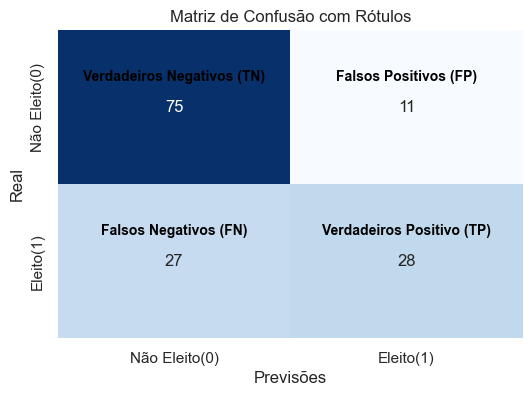

In [23]:
# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Grid de parâmetros que vamos testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup do GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

# Treinar
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
melhor_rf = grid_search.best_estimator_

# Testar no conjunto de teste
y_pred_melhor_rf = melhor_rf.predict(X_test)

# Avaliar
print('Acurácia (Random Forest melhorado):', accuracy_score(y_test, y_pred_melhor_rf))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred_melhor_rf))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_melhor_rf))


# Função para plotar a Matriz de Confusão com rótulos explicativos
def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'

            # Ajustar a posição do texto para não sobrepor os números
            y_offset = -0.2  # Deslocar o texto para baixo
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=10, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.show()
    
    # Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_melhor_rf)
labels = ['Não Eleito(0)','Eleito(1)']  
# Plotar a matriz de confusão com rótulos
plot_confusion_matrix_with_labels(cm, labels)


### Modelo Random Forest Otimizado com Balanceamento

A fim de lidar com o desbalanceamento entre as classes "Eleito" e "Não Eleito", foi utilizado um modelo Random Forest otimizado com balanceamento de classes.

**Resultado da Acurácia (dados de validação):**  
O modelo apresentou uma acurácia de **0.709**, ligeiramente inferior à do modelo anterior (0.730). No entanto, ele mostrou melhorias em termos de **equilíbrio entre as classes**.

**Relatório de Classificação:**

| Classe | Precision | Recall | F1-score | Suporte |
|--------|-----------|--------|----------|---------|
| 0 (Não Eleito) | 0.75 | 0.78 | 0.77 | 86 |
| 1 (Eleito)     | 0.63 | 0.60 | 0.62 | 55 |

- O desempenho para a classe "Eleito" melhorou: o **recall aumentou de 51% para 60%**, e o F1-score de 0.60 para 0.62.
- O desempenho para "Não Eleito" manteve-se estável, com pequena queda em recall (de 87% para 78%), mas ainda com boa precisão (0.75) e F1-score (0.77).
- A média harmônica entre as métricas das classes (macro avg) foi de **0.69**, indicando um bom equilíbrio.

**Matriz de Confusão:**

|               | Previsto: Eleito | Previsto: Não Eleito |
|---------------|----------------------|------------------|
| **Real: Não Eleito** | 67                   | 19               |
| **Real: Eleito**     | 22                   | 33               |

- O modelo balanceado **reduziu os falsos negativos** (de 27 para 22) e **aumentou os verdadeiros positivos** (de 28 para 33).
- Houve leve aumento nos falsos positivos (de 11 para 19), mas dentro de uma margem aceitável diante do maior equilíbrio.

**Conclusão:**  
Apesar da acurácia ligeiramente menor, o modelo balanceado apresenta **maior justiça na classificação entre as duas classes**, tornando-o uma alternativa mais robusta quando a **sensibilidade para ambas as classes** é importante. Essa versão seria preferível em contextos onde a **classificação errada dos não eleitos tem impacto relevante**.


In [24]:
# Definindo o modelo
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Hiperparâmetros para buscar
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Busca aleatória
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Treinar
random_search.fit(X_train, y_train)

# Previsões
y_pred_rf_bal = random_search.predict(X_test)

# Avaliar
print('Acurácia (Random Forest otimizado e balanceado):', accuracy_score(y_test, y_pred_rf_bal))
print('\nRelatório de Classificação:\n', classification_report(y_test, y_pred_rf_bal))
print('\nMatriz de Confusão:\n', confusion_matrix(y_test, y_pred_rf_bal))

Acurácia (Random Forest otimizado e balanceado): 0.7092198581560284

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        86
           1       0.63      0.60      0.62        55

    accuracy                           0.71       141
   macro avg       0.69      0.69      0.69       141
weighted avg       0.71      0.71      0.71       141


Matriz de Confusão:
 [[67 19]
 [22 33]]


### **Acurácia Geral**
O modelo XGBoost Melhorado apresentou uma acurácia de **0.766**, ou seja, acertou aproximadamente **76,6%** das previsões no conjunto de teste.

---

### **Relatório de Classificação**

| Classe         | Precision | Recall | F1-score | Suporte |
|----------------|-----------|--------|----------|---------|
| Não Eleito     | 0.77      | 0.88   | 0.82     | 86      |
| Eleito         | 0.76      | 0.58   | 0.66     | 55      |

- **Classe Não Eleito:**
  - **Precision (77%)**: Quando o modelo previu que o candidato não seria eleito, acertou 77% das vezes.
  - **Recall (88%)**: De todos os candidatos que realmente não foram eleitos, o modelo identificou corretamente 88%.
  - **F1-score (82%)**: Indica excelente desempenho na identificação de não eleitos.

- **Classe Eleito:**
  - **Precision (76%)**: Quando o modelo previu eleição, acertou 76% das vezes.
  - **Recall (58%)**: De todos os eleitos, o modelo identificou corretamente 58%.
  - **F1-score (66%)**: Razoável, mas com margem para melhoria na sensibilidade.

---

### **Matriz de Confusão**

|                         | Previsto: Não Eleito | Previsto: Eleito |
|-------------------------|----------------------|------------------|
| **Real: Não Eleito**    | 76                   | 10               |
| **Real: Eleito**        | 23                   | 32               |

- **Verdadeiros Negativos (VN)**: 76  
- **Falsos Positivos (FP)**: 10  
- **Falsos Negativos (FN)**: 23  
- **Verdadeiros Positivos (VP)**: 32


Acurácia (XGBoost otimizado): 0.7659574468085106

Relatório de Classificação (XGBoost):

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        86
           1       0.76      0.58      0.66        55

    accuracy                           0.77       141
   macro avg       0.76      0.73      0.74       141
weighted avg       0.77      0.77      0.76       141



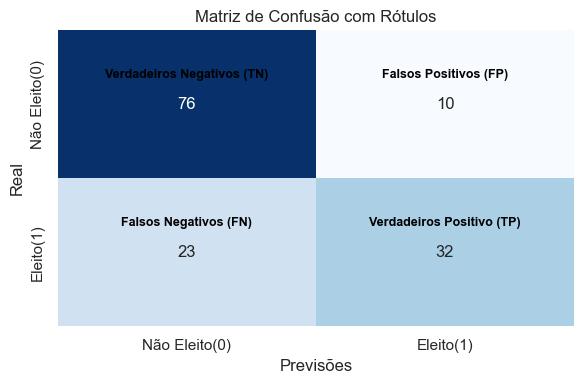

In [ ]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.3]
}

# Ajustar o modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='logloss')

# Continuar com o restante do código
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Melhor modelo encontrado
best_xgb = grid_xgb.best_estimator_

# Avaliação
y_pred_xgb_best = best_xgb.predict(X_test)
def plot_confusion_matrix_with_labels(cm, labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)

    # Adicionar os rótulos nas células
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            label = ''
            if i == 0 and j == 0:
                label = 'Verdadeiros Negativos (TN)'
            elif i == 0 and j == 1:
                label = 'Falsos Positivos (FP)'
            elif i == 1 and j == 0:
                label = 'Falsos Negativos (FN)'
            elif i == 1 and j == 1:
                label = 'Verdadeiros Positivo (TP)'


            y_offset = -0.2
            plt.text(j + 0.5, i + 0.5 + y_offset, label, ha='center', va='center', color='black', fontsize=9, weight='bold')

    plt.title('Matriz de Confusão com Rótulos')
    plt.xlabel('Previsões')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()

cm_xgb = confusion_matrix(y_test, y_pred_xgb_best)
labels = ['Não Eleito(0)', 'Eleito(1)']  # Atualizar se quiser


print("Acurácia (XGBoost otimizado):", accuracy_score(y_test, y_pred_xgb_best))
print("\nRelatório de Classificação (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb_best))


plot_confusion_matrix_with_labels(cm_xgb, labels)

## 3.3 Medidas de Desempenho

### Interpretação dos Resultados de Acurácia dos Modelos
A acurácia é uma métrica que indica a proporção de previsões corretas feitas pelo modelo. Com base nos resultados obtidos:

**XGBoost Melhorado** apresentou a maior acurácia dentre todos os modelos, com 0.7659, ou seja, cerca de 76,6% das previsões foram corretas. Isso sugere que o modelo foi capaz de aprender bem os padrões nos dados e generalizar para o conjunto de teste.

**Árvore de Decisão e Gradient Boosting** ficaram empatados, ambos com uma acurácia de 0.7447. Esses modelos também demonstraram bom desempenho, com mais de 74% de acerto.

O **Random Forest Melhorado** obteve 0.7305, superando as versões padrão e balanceada do mesmo algoritmo. Isso indica que ajustes no hiperparâmetros e no processo de treinamento ajudaram a melhorar a performance.

As versões **Random Forest Otimizado e Balanceado** (0.7092) e **Random Forest padrão** (0.7021) tiveram desempenhos medianos, mostrando que o balanceamento de classes ajudou um pouco, mas não superou o modelo melhorado.

O **XGBoost padrão** foi o modelo com menor acurácia, com 0.6879, indicando que a versão não ajustada do algoritmo teve dificuldade em capturar os padrões dos dados.

In [29]:
# Criar um dicionário com os resultados
resultados = {
    'Modelo': [
        'Árvore de Decisão',
        'Random Forest',
        'Gradient Boosting',
        'XGBoost',
        'Random Forest Melhorado',
        'Random Forest Otimizado e Balanceado',
        'XGBoost Melhorado'
    ],
    'Acurácia': [
        0.7446808510638298,
        0.7021276595744681,
        0.7446808510638298,
        0.6879432624113475,
        0.7304964539007093,
        0.7092198581560284,
        0.7659574468085106
    ]
}

# Criar o DataFrame
df_resultados = pd.DataFrame(resultados)

# Exibir o DataFrame
display(df_resultados)

,Modelo,Acurácia
0,Árvore de Decisão,0.744681
1,Random Forest,0.702128
2,Gradient Boosting,0.744681
3,XGBoost,0.687943
4,Random Forest Melhorado,0.730496
5,Random Forest Otimizado e Balanceado,0.709220
6,XGBoost Melhorado,0.765957


# Conclusão

Este estudo buscou compreender os fatores que influenciam o sucesso eleitoral de candidatos à prefeitura no Estado do Ceará em 2024, a partir da análise de características pessoais e sociais como gênero, raça, escolaridade, ocupação e filiação partidária. A proposta partiu da motivação de investigar possíveis desigualdades e padrões que permeiam o processo eleitoral, especialmente no que se refere à representatividade de grupos historicamente sub-representados.

A aplicação de diferentes algoritmos de aprendizado de máquina — como Árvore de Decisão, Random Forest, Gradient Boosting e XGBoost — permitiu avaliar a capacidade preditiva desses modelos em identificar corretamente candidatos eleitos e não eleitos. O modelo XGBoost Melhorado apresentou o melhor desempenho, com uma acurácia de aproximadamente 76,6%, seguido de perto por outros modelos bem ajustados.

A análise das métricas de classificação e das matrizes de confusão revelou um padrão consistente: os modelos tiveram melhor desempenho em prever corretamente os candidatos não eleitos, em comparação aos eleitos. Isso pode indicar um leve viés nos dados, uma vez que o comportamento de falha eleitoral parece mais fácil de capturar a partir das variáveis fornecidas.

De maneira geral, os resultados apontam para a existência de padrões significativos no perfil dos candidatos eleitos, o que reforça a hipótese de que variáveis sociais e políticas influenciam o desfecho das eleições. Embora os modelos não sejam determinísticos, eles oferecem indícios importantes que podem alimentar reflexões sobre desigualdades estruturais, comportamento do eleitorado e a eficácia de políticas de inclusão política.

Assim, este trabalho contribui com evidências empíricas para o debate sobre representatividade nas eleições municipais e aponta caminhos para futuras investigações e intervenções que promovam uma democracia mais equitativa.